In [213]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\jdlma\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [214]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\jdlma\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

In [216]:
#importação dos dados do ibovespa em arquivo csv de 01/01/1995 a 11/01/2025
ibov = pd.read_csv('https://raw.githubusercontent.com/jdlmauricio/techalleg_fase_2/refs/heads/main/Dados%20Hist%C3%B3ricos%20-%20Ibovespa.csv')

ibov.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,30.12.2024,120.283,120.267,121.050,120.158,"8,90M","0,01%"
1,27.12.2024,120.269,121.078,121.609,120.252,"8,94M","-0,67%"
2,26.12.2024,121.078,120.767,121.612,120.428,"8,34M","0,26%"
3,23.12.2024,120.767,122.105,122.105,120.617,"9,95M","-1,09%"
4,20.12.2024,122.102,121.183,122.209,120.700,"18,13M","0,75%"


In [217]:
ibov.shape

(4953, 7)

In [218]:
ibov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4953 entries, 0 to 4952
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Data      4953 non-null   object 
 1   Último    4953 non-null   float64
 2   Abertura  4953 non-null   float64
 3   Máxima    4953 non-null   float64
 4   Mínima    4953 non-null   float64
 5   Vol.      4952 non-null   object 
 6   Var%      4953 non-null   object 
dtypes: float64(4), object(3)
memory usage: 271.0+ KB


In [219]:
ibov.index = pd.to_datetime(ibov.Data, format='%d.%m.%Y')

In [220]:
ibov.index

DatetimeIndex(['2024-12-30', '2024-12-27', '2024-12-26', '2024-12-23',
               '2024-12-20', '2024-12-19', '2024-12-18', '2024-12-17',
               '2024-12-16', '2024-12-13',
               ...
               '2005-01-14', '2005-01-13', '2005-01-12', '2005-01-11',
               '2005-01-10', '2005-01-07', '2005-01-06', '2005-01-05',
               '2005-01-04', '2005-01-03'],
              dtype='datetime64[ns]', name='Data', length=4953, freq=None)

In [221]:
ibov.drop('Data', inplace=True, axis=1)
ibov.head()

,Último,Abertura,Máxima,Mínima,Vol.,Var%
Data,,,,,,
2024-12-30,120.283,120.267,121.050,120.158,"8,90M","0,01%"
2024-12-27,120.269,121.078,121.609,120.252,"8,94M","-0,67%"
2024-12-26,121.078,120.767,121.612,120.428,"8,34M","0,26%"
2024-12-23,120.767,122.105,122.105,120.617,"9,95M","-1,09%"
2024-12-20,122.102,121.183,122.209,120.700,"18,13M","0,75%"


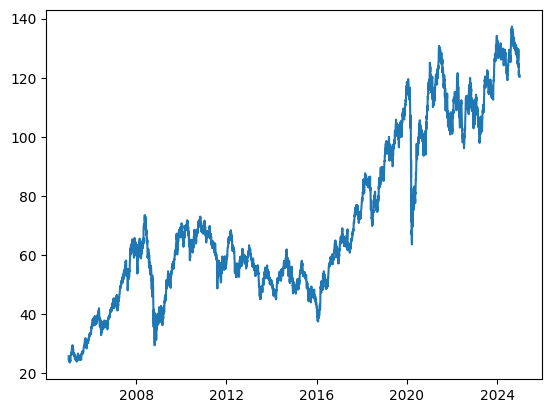

In [222]:
plt.plot(ibov.index, ibov.Último)

In [223]:
ibov.columns

Index(['Último', 'Abertura', 'Máxima', 'Mínima', 'Vol.', 'Var%'], dtype='object')

In [224]:
resultados = seasonal_decompose(ibov['Último'], model='additive', period=252)


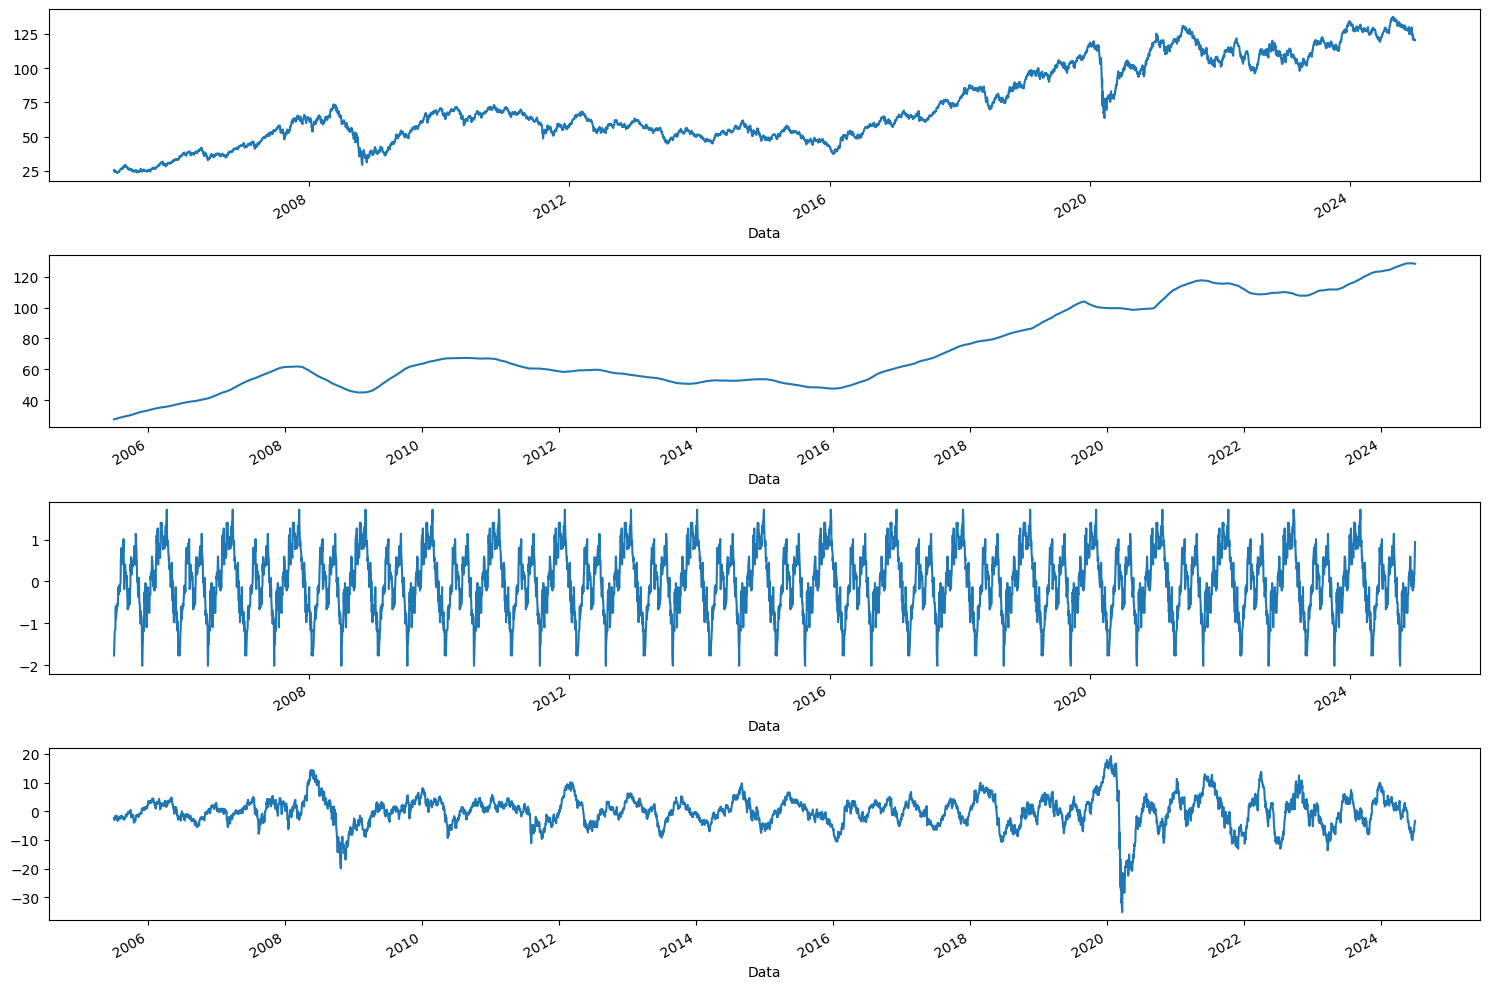

In [225]:
fig, (ax1,ax2,ax3,ax4)= plt.subplots(4,1, figsize = (15,10))

resultados.observed.plot(ax = ax1)
resultados.trend.plot(ax = ax2)
resultados.seasonal.plot(ax = ax3)
resultados.resid.plot(ax = ax4)

plt.tight_layout()

In [ ]:
#estacionaria ou não estacionaria

#teste ADF: aumented dickey-fuller usado para validar a serie temporal de estrategia utilizada

#H0 = hipotese nula (não é estacionaria)

#H1 - hipotese auternativa ( é estacionaria)

# p -value = 0,05, rejeita H0 com um nível de confiaça de 95%



In [226]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
sns.set_style('darkgrid')

In [235]:
X = ibov.Último.values

In [238]:
result = adfuller(X)

print("Teste ADF")
print(f"Teste estatístico: {result[0]}")
print(f"p-value: {result[1]}")
print(f"Valores Críticos:")

for key, value in result [4].items():
    print(f'\t{key}: {value}')

Teste ADF
Teste estatístico: -1.5733076121469949
p-value: 0.4969865905504075
Valores Críticos:
	1%: -3.4316738971778435
	5%: -2.8621250178829576
	10%: -2.567081405988135


In [ ]:
#H0 = hipotese nula (não é estacionaria)